In [11]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

data=pd.read_excel("lab4_ml.xlsx")
print(data)

        age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no


In [12]:
#A1
def calculate_entropy(data):
    counts = data.value_counts()
    probabilities = counts / len(data)
    entropy = -sum(probabilities * probabilities.apply(math.log2))
    return entropy

target_entropy = calculate_entropy(data['buys_computer'])


def calculate_information_gain(data, target_entropy, attribute):
    attribute_values = data[attribute].unique()
    attribute_entropy = 0
    
    for value in attribute_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset['buys_computer'])
        probability = len(subset) / len(data)
        attribute_entropy += probability * subset_entropy
    
    information_gain = target_entropy - attribute_entropy
    return information_gain

attributes = data.columns[0:4]
information_gains = {}

for attribute in attributes:
    information_gains[attribute] = calculate_information_gain(data, target_entropy, attribute)
    print(f"Information gain of {attribute} - {calculate_information_gain(data, target_entropy, attribute)}")


root_node = max(information_gains, key=information_gains.get)
print(f"The first feature for constructing the decision tree is: '{root_node}' as it has highest information gain")

Information gain of age - 0.24674981977443933
Information gain of income - 0.02922256565895487
Information gain of student - 0.15183550136234159
Information gain of credit_rating - 0.04812703040826949
The first feature for constructing the decision tree is: 'age' as it has highest information gain


In [13]:
#A2
mapping = {
    'age': {'<=30': 0, '31...40': 1, '>40': 2},
    'income': {'low': 0, 'medium': 1, 'high': 2},
    'student': {'no': 0, 'yes': 1},
    'credit_rating': {'fair': 0, 'excellent': 1},
    'buys_computer': {'no': 0, 'yes': 1}
}

data = data.replace(mapping)

X= data.iloc[:,0:4]
y=data["buys_computer"]

model= DecisionTreeClassifier()
model.fit(X,y)

print(f"Accuracy of this model - {model.score(X,y)}")
print(f"Depth of this model - {model.get_depth()}")

Accuracy of this model - 1.0
Depth of this model - 4


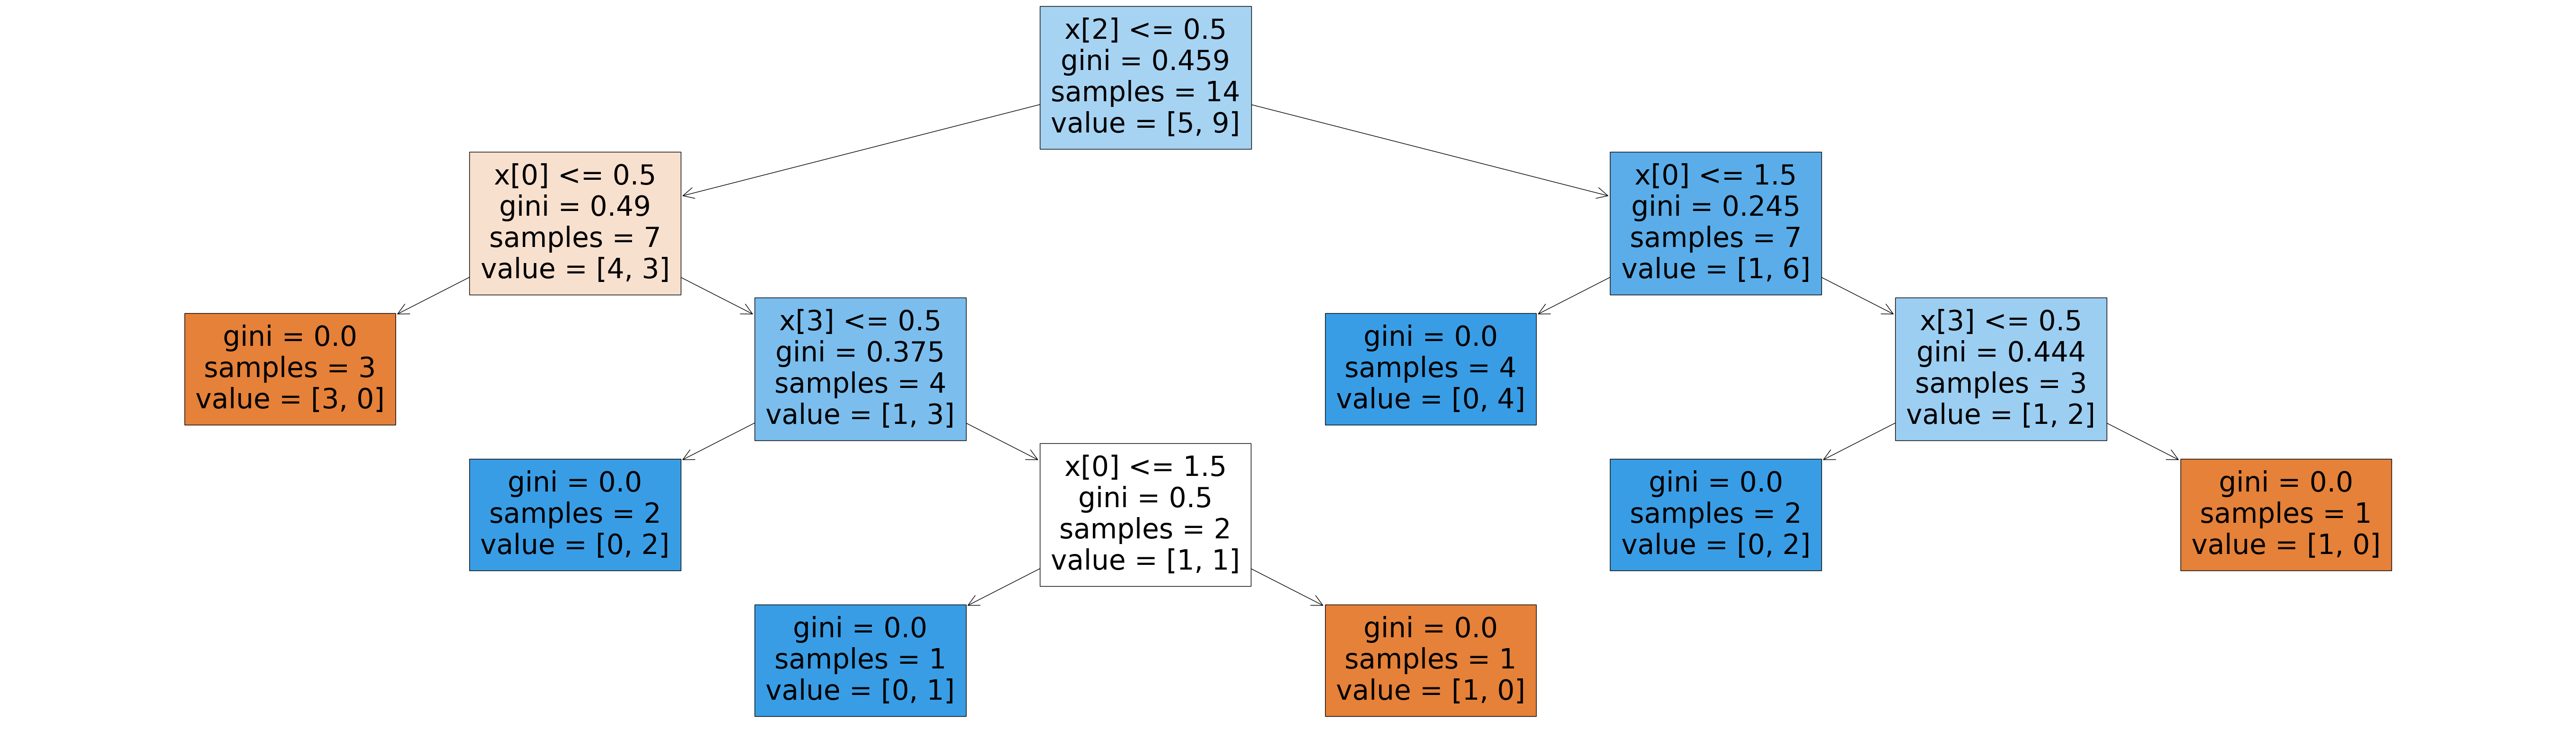

In [14]:
#A3
plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

Accuracy of training model - 1.0
Accuracy of testing model - 0.9204
Depth of this model - 25


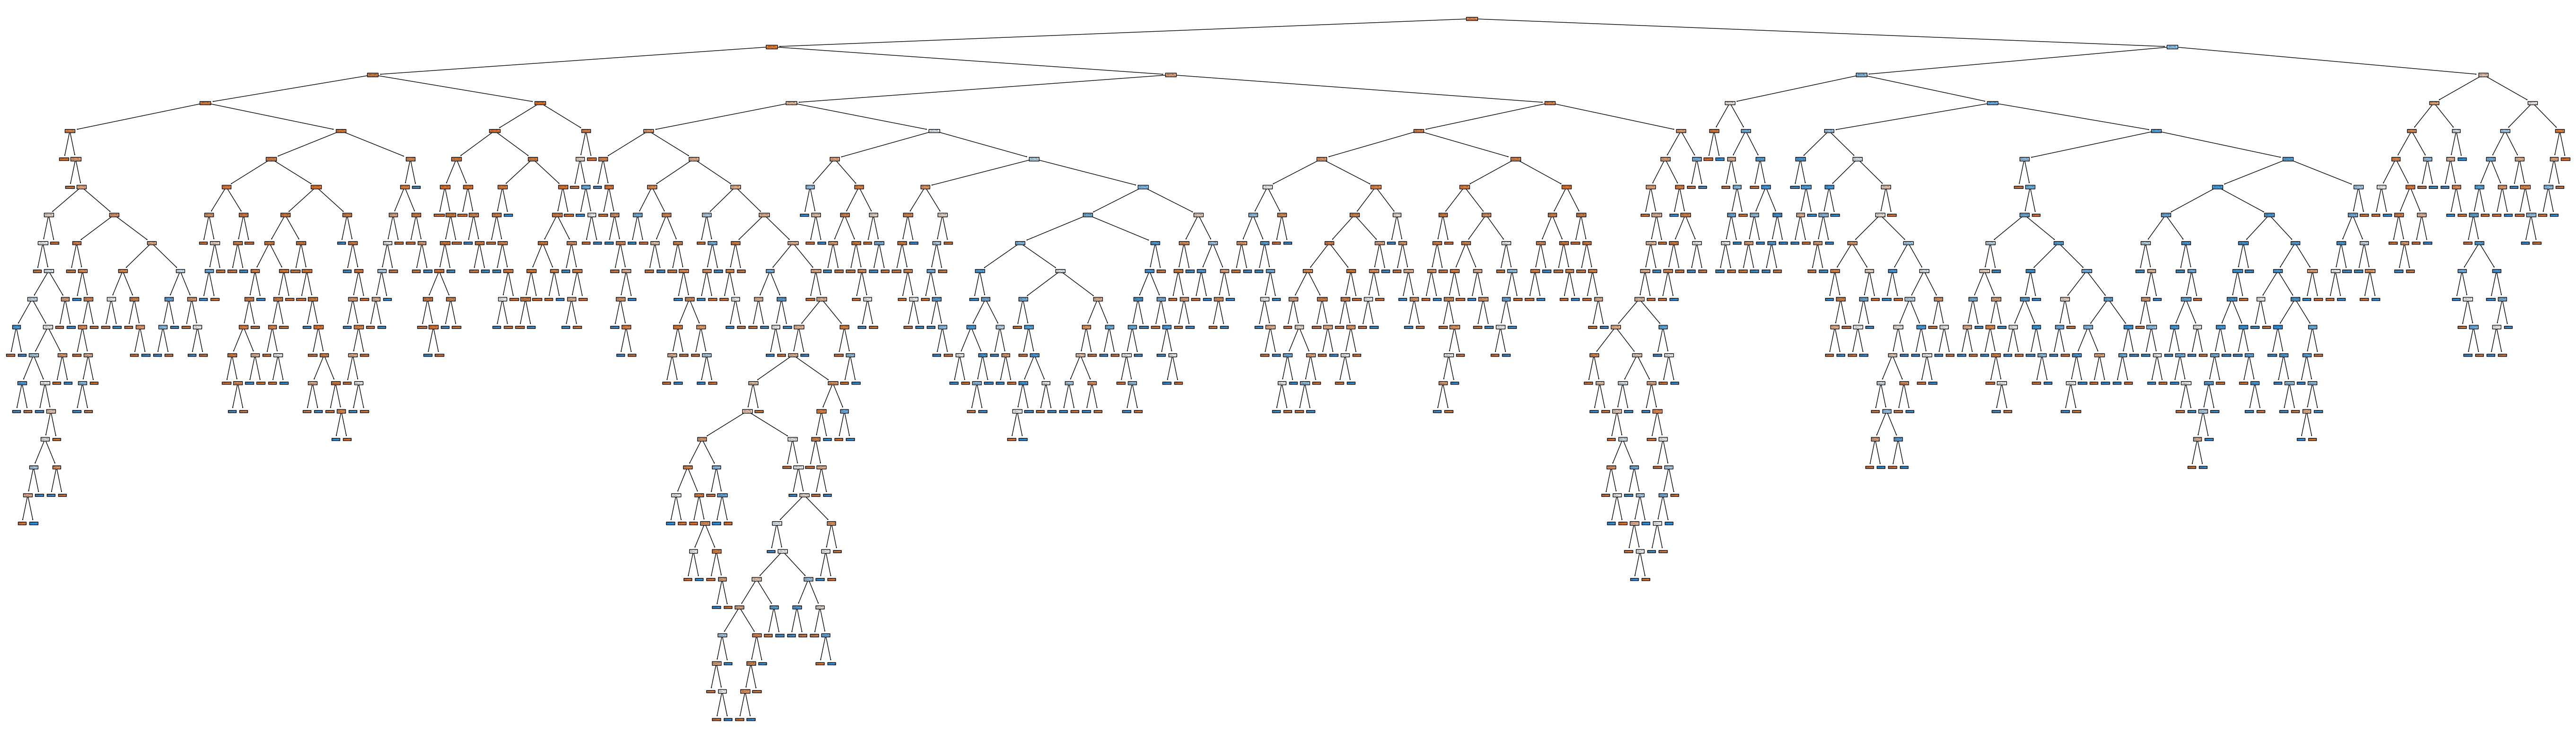

In [20]:
#A4
data = pd.read_csv("SolarPrediction.csv")

data['Radiation_Class']=  pd.cut(data['Radiation'], 
                                 bins=[0, 800,  1610], labels=[0, 1])

X= data.iloc[:10000,4:9]
y=data['Radiation_Class'].iloc[:10000]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

model1= DecisionTreeClassifier()
model1.fit(X_train,y_train)

print(f"Accuracy of training model - {model1.score(X_train,y_train)}")
print(f"Accuracy of testing model - {model1.score(X_test,y_test)}")
print(f"Depth of this model - {model1.get_depth()}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model1, filled=True) 
plt.show()

Accuracy of training model - 0.9338666666666666
Accuracy of testing model - 0.9256
Depth of this model - 5


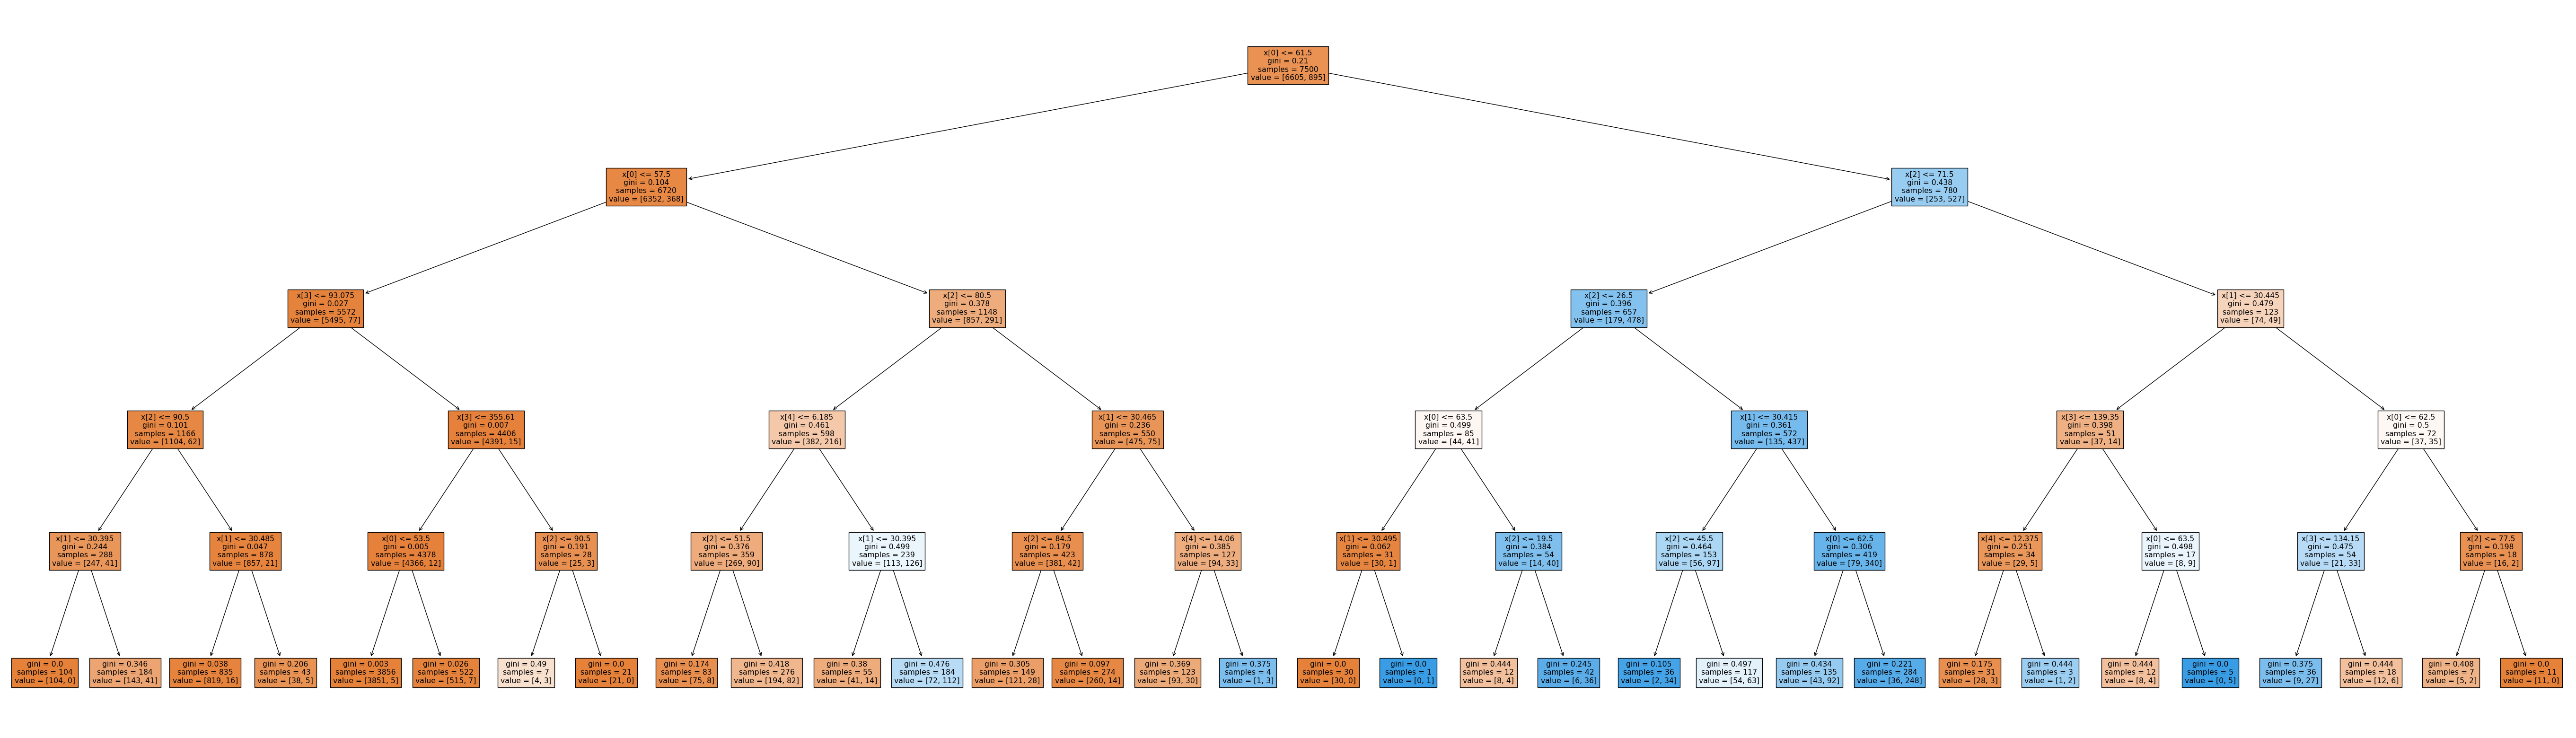

In [19]:
#A5
model= DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

print(f"Accuracy of training model - {model.score(X_train,y_train)}")
print(f"Accuracy of testing model - {model.score(X_test,y_test)}")
print(f"Depth of this model - {model.get_depth()}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

Accuracy of training model - 1.0
Accuracy of testing model - 0.9312
Depth of this model - 20
Diff. between the default criterion and entropy criterion accuracy of training model : 0.0
Diff. between the default criterion and entropy criterion accuracy of testing model : -0.012400000000000078


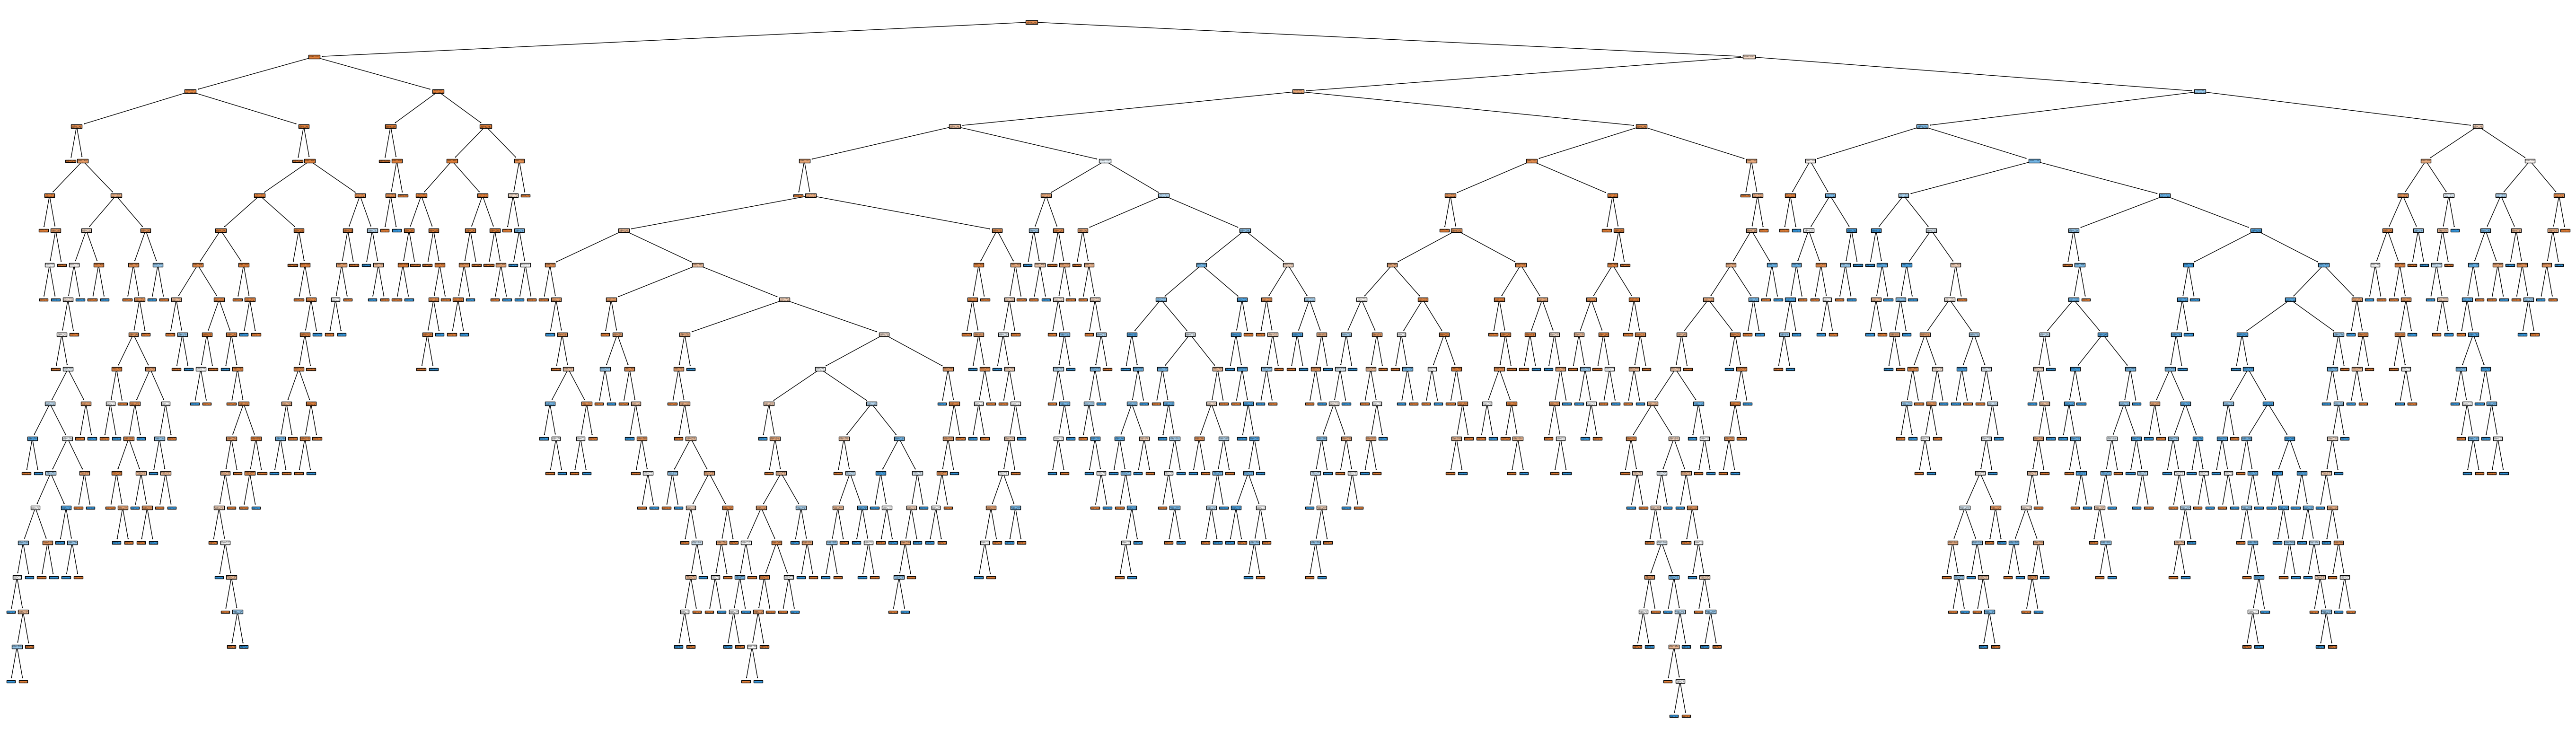

In [17]:
#A6
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

print(f"Accuracy of training model - {model.score(X_train,y_train)}")
print(f"Accuracy of testing model - {model.score(X_test,y_test)}")
print(f"Depth of this model - {model.get_depth()}")

print(f"Diff. between the default criterion and entropy criterion accuracy of training model : {(model1.score(X_train,y_train))-(model.score(X_train,y_train))}")
print(f"Diff. between the default criterion and entropy criterion accuracy of testing model : {(model1.score(X_test,y_test))-(model.score(X_test,y_test))}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

In [18]:
#A7
model= RandomForestClassifier()
model.fit(X_train,y_train)

rf_predictions = model.predict(X_test)

print("Testing -\n")
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


model= DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_predictions = model.predict(X_test)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Random Forest Classifier Metrics:
Accuracy: 0.9412
Confusion Matrix:
 [[2163   48]
 [  99  190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2211
           1       0.80      0.66      0.72       289

    accuracy                           0.94      2500
   macro avg       0.88      0.82      0.84      2500
weighted avg       0.94      0.94      0.94      2500

Decision Tree Classifier Metrics:
Accuracy: 0.916
Confusion Matrix:
 [[2104  107]
 [ 103  186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2211
           1       0.63      0.64      0.64       289

    accuracy                           0.92      2500
   macro avg       0.79      0.80      0.80      2500
weighted avg       0.92      0.92      0.92      2500



In [3]:
#A8
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

print("Parameters:")
print("n_estimators: The number of trees in the forest. Default is 100.")
print("criterion: The function to measure the quality of a split. Supported criteria are gini for the Gini impurity and entropy for the information gain. Default is gini.")
print("max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Default is None.")
print("min_samples_split: The minimum number of samples required to split an internal node. Default is 2.")
print("min_samples_leaf: The minimum number of samples required to be at a leaf node. Default is 1.")


Parameters:
n_estimators: The number of trees in the forest. Default is 100.
criterion: The function to measure the quality of a split. Supported criteria are gini for the Gini impurity and entropy for the information gain. Default is gini.
max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Default is None.
min_samples_split: The minimum number of samples required to split an internal node. Default is 2.
min_samples_leaf: The minimum number of samples required to be at a leaf node. Default is 1.
